In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image, ImageOps
import glob
import os
import cv2

In [12]:
local_dir = os.getcwd()
dataset_path = os.path.join(local_dir, 'data')
train_path = os.path.join(dataset_path,'train_gray')
test_path = os.path.join(dataset_path,'test_gray')
test_path

'C:\\Users\\user00\\aiffel\\online2nd_pss\\exploration05\\data\\test_gray'

In [27]:
def rotate_image(img):
    coloredImg = cv2.imread(img)
    grayimg = cv2.cvtColor(coloredImg, cv2.COLOR_BGR2GRAY)
    img90 = cv2.rotate(grayimg, cv2.ROTATE_90_CLOCKWISE) 
    img180 = cv2.rotate(grayimg, cv2.ROTATE_180) 
    img270 = cv2.rotate(grayimg, cv2.ROTATE_90_COUNTERCLOCKWISE)
    return img90, img180, img270
    
def resize_images(img_path):
    images=glob.glob(img_path + "\\*.jpg")  
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(64,64)
    for img in images:
        old_img=Image.open(img)
        gray_image = ImageOps.grayscale(old_img)
        new_img=gray_image.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        rotate_imgs = rotate_image(img)
        for index, rt_img in enumerate(rotate_imgs):
            new_rt_img = img.replace('.','_' + str(index) + '.')
            cv2.imwrite(new_rt_img,rt_img)
            
    print(len(images), " images resized.")
    
def test_resize_imges(img_path):
    images=glob.glob(img_path + "\\*.jpg")  
    print(len(images), " images to be resized.")
    target_size=(64,64)
    for img in images:
        old_img=Image.open(img)
        gray_image = ImageOps.grayscale(old_img)
        new_img=gray_image.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        rotate_imgs = rotate_image(img)
    print(len(images), " images resized.")

    
    
def load_data(img_path, number_of_data=1200):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=1
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'\\scissor\\*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        print(img)
        print(imgs[idx])
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'\\rock\\*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:] =img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'\\paper\\*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("이미지 개수는", idx,"입니다.")
    return imgs, labels

# train data 만들기

In [ ]:
rsp_arr = ['rock','scissor','paper']

for i in rsp_arr:
    temp_dir = os.path.join(train_path + '\\' + i)
    resize_images(temp_dir)

In [28]:
(x_train, y_train)=load_data(train_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

[[117 119 121 ... 165 165 165]
 [116 118 121 ... 165 165 165]
 [115 117 120 ... 165 165 165]
 ...
 [125 127 131 ... 141 141 141]
 [122 125 128 ... 141 140 140]
 [120 123 126 ... 140 140 140]]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


ValueError: could not broadcast input array from shape (64,64) into shape (64,64,1)

# test data 만들기

In [185]:
for i in rsp_arr:
    temp_dir = os.path.join(test_path + '\\' + i)
    test_resize_imges(temp_dir)

(x_test, y_test)=load_data(test_path, number_of_data=300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

100  images to be resized.


C:\Users\user00\AppData\Local\Temp\ipykernel_110376\422556392.py:31: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
이미지 개수는 300 입니다.


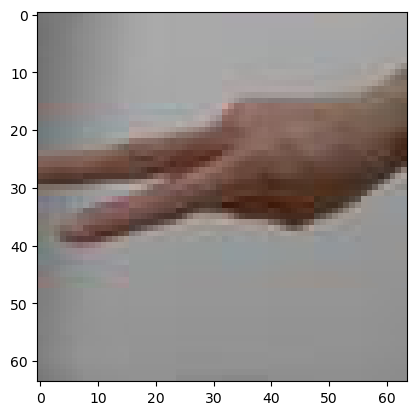

In [186]:
plt.imshow(x_train[idx],cmap=plt.cm.binary)
plt.show()

In [201]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 6272)              0         
                                                                 
 dense_48 (Dense)            (None, 32)              

In [202]:
model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 6272)              0         
                                                                 
 dense_48 (Dense)            (None, 32)              

In [204]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

10/10 - 0s - loss: 5.5022 - accuracy: 0.3000 - 114ms/epoch - 11ms/step


In [205]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 [==============================] - 0s 9ms/step
model.predict() 결과 :  [1.0905551e-03 1.1903876e-05 9.9889755e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


예측확률분포: [4.2888764e-04 2.3255954e-05 9.9954778e-01]
라벨: 0, 예측결과: 2


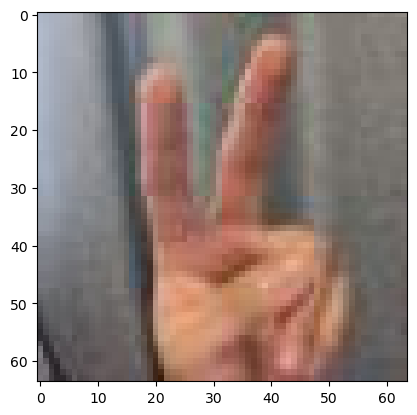

예측확률분포: [6.4390644e-02 1.9649213e-05 9.3558973e-01]
라벨: 0, 예측결과: 2


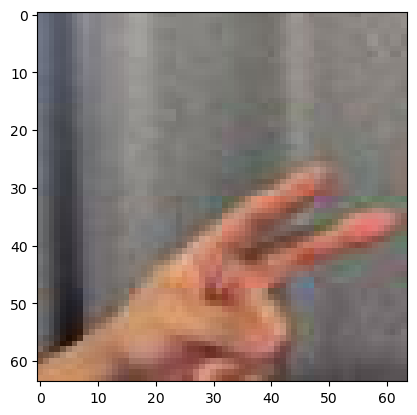

예측확률분포: [1.17063075e-02 2.62945454e-04 9.88030732e-01]
라벨: 0, 예측결과: 2


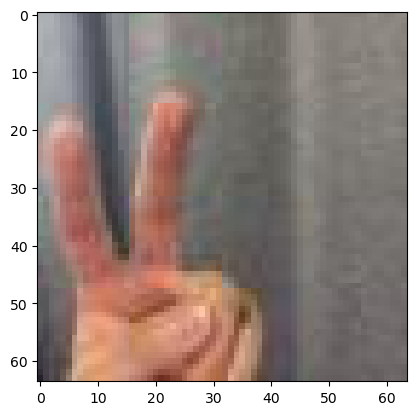

예측확률분포: [2.5152600e-01 4.8355272e-05 7.4842566e-01]
라벨: 1, 예측결과: 2


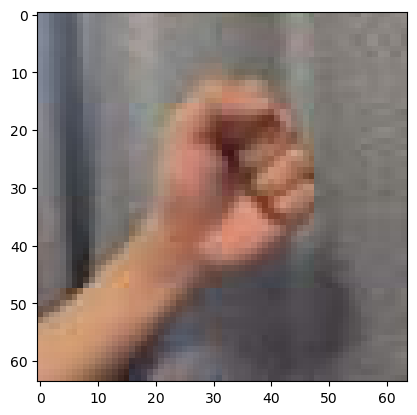

예측확률분포: [1.12374224e-01 2.15987660e-04 8.87409747e-01]
라벨: 1, 예측결과: 2


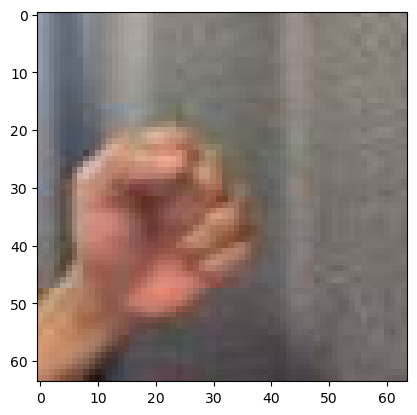

In [206]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()